<div class="alert alert-block alert-success">
    <h2 class="card-title">1. Hough Transform 구현하기</h2>
</div>

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

(612, 612, 3)


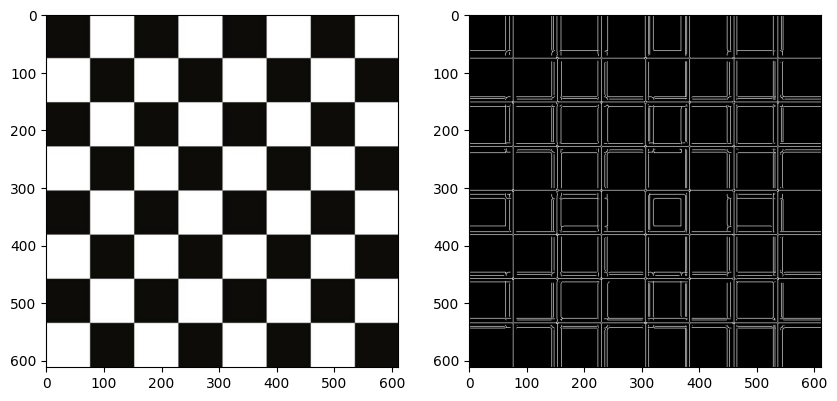

In [32]:
Box = cv2.imread('data/chessboard.jpg')
print(Box.shape)
Box_edges = cv2.Canny(Box, 100, 200, 1, 7, True) 

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(Box, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Box_edges, cmap="gray")
plt.show()

* hough transform

In [33]:
def hough_transform(image):
    width = image.shape[1]
    height = image.shape[0]
    
    diag_len = np.ceil(np.sqrt(width * width + height * height)) # max distance for rho = length of diag.
    # 2 * diag length : for positive and negative max distance. 0 being diag_len
    rho_range = int(2*diag_len)
    
    # Initialize empty accumulator (filled with 0)
    hough_accu = np.zeros([rho_range, 180])    # 180 because theta from 0 to 180

    # get i and j indexes for all indexes 
    j_indexes, i_indexes = np.nonzero(image)

    # Browsing into each pixel of edges picture
    for k in range(len(j_indexes)):
        # getting indexes of edge
        i = i_indexes[k]
        j = j_indexes[k]

        # voting : for each value of theta
        for theta in range(0, 180):
            rho = int(np.round(i * np.cos(np.deg2rad(theta)) + j * np.sin(np.deg2rad(theta))) + diag_len)# positive index for rho
            hough_accu[rho, theta] += 1
    
    return hough_accu

* find peak

In [34]:
# Peak finding
def peak_finding(hough_accu, min_distance = 45, max_peaks = 6, title ='Hough Transform'):

    coordinates = peak_local_max(hough_accu, min_distance=min_distance, exclude_border = False, num_peaks =max_peaks)
    
    loca_maxs_rho = coordinates[:, 0]
    loca_maxs_theta = coordinates[:, 1]
    plt.imshow(hough_accu, cmap='gray',aspect='auto')
    plt.title(title)

    # Annotate local maximum
    for i in range(len(loca_maxs_rho)):
        plt.annotate('X',xy=(loca_maxs_theta[i],loca_maxs_rho[i]), arrowprops=dict(facecolor='yellow', shrink=0.03),)
    plt.show()
    return loca_maxs_rho, loca_maxs_theta

* draw line

In [35]:
def draw_line(image, loca_maxs_rho, loca_maxs_theta, rgb = (0,255,0)):
    image_copy = image.copy()
    width = image_copy.shape[1]
    height = image_copy.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) 
    for j in range(len(loca_maxs_rho)):
        rho = loca_maxs_rho[j] - diag_len
        theta = loca_maxs_theta[j]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x1=int(a*rho - diag_len*b) 
        y1=int(b*rho + diag_len*a)
        x2=int(a*rho + diag_len*b)
        y2=int(b*rho - diag_len*a)
        #print(x1,y1,x2,y2)
        cv2.line(image_copy, (x1,y1),(x2,y2), rgb, 3) # green line
        #print('Line {} | rho = {} theta = {}'.format(j,loca_maxs_rho[j], loca_maxs_theta[j]))
        plt.imshow(image_copy)
        plt.title('Detected Line')

    plt.show()
    return image_copy

### Apply func

In [36]:
image = Box_edges
hough_accu = hough_transform(image)

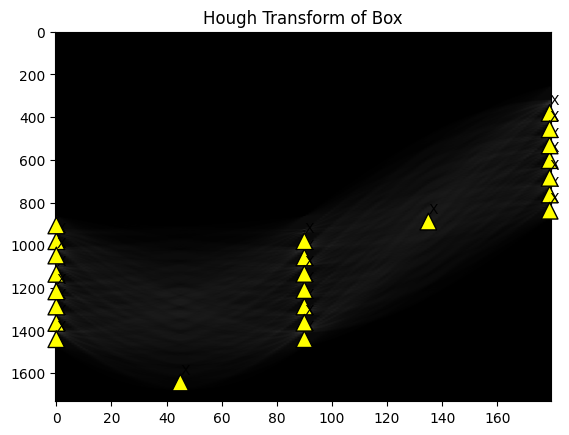

In [37]:
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu, max_peaks=50, title='Hough Transform of Box')

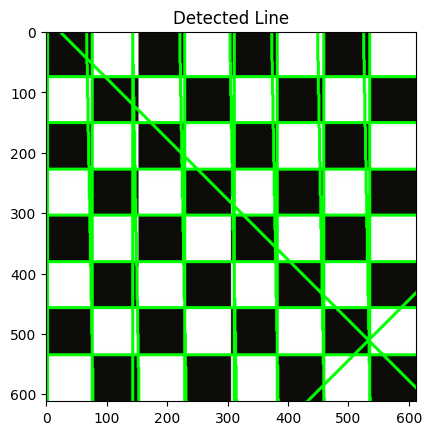

In [38]:
nDraw = draw_line(Box, loca_maxs_rho, loca_maxs_theta)

In [ ]:
mean = 0
var = 0.1
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = image + gauss

<div class="alert alert-block alert-success">
    <h2 class="card-title">2. OpenCV의 HoughLines함수 이용하기</h2>
</div>

https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

English:
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html


Korean:
https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html

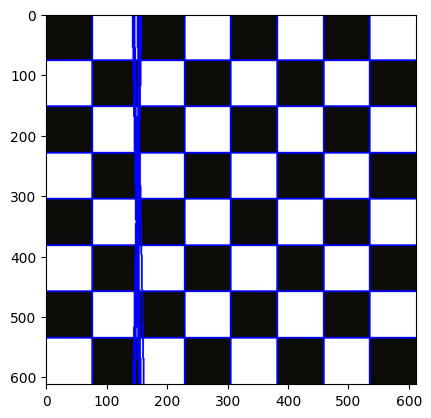

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/chessboard.jpg')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)

for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


plt.imshow(img)

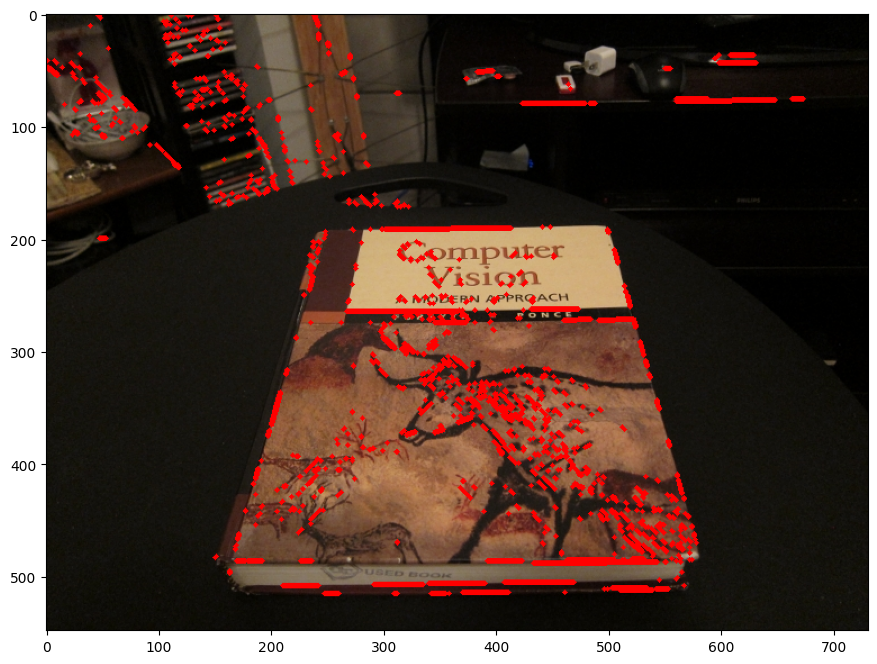

In [6]:
import cv2
import numpy as np

img = cv2.imread('data/cv_desk.png')
edges = cv2.Canny(img,50,200,apertureSize = 3)
gray = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
minLineLength = 100
maxLineGap = 0

lines = cv2.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()
# plt.imshow(edges)